# TP3

# Clustering de documents

### Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

In [4]:
# La décennie 
DECADE = '1940'

### Charger tous les fichiers de la décennie et en créer une liste de textes

In [5]:
# Choisir une décennie 
DECADE = '1940'

In [6]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [7]:
# Exemple de fichiers
files[:5]

['Bxl_1945_Tome_II1_Part_1.txt',
 'Bxl_1945_Tome_II1_Part_2.txt',
 'Bxl_1945_Tome_II1_Part_3.txt',
 'Bxl_1945_Tome_II1_Part_4.txt',
 'Bxl_1945_Tome_II1_Part_5.txt']

In [8]:
texts = [open(data_path + f).read() for f in files]

In [9]:
# Exemple de textes
texts[0][:400]

"Juillet\n\n1945.\n\nPUBLICATION\n\nVSLIE\n\nDE\n\nJG\n\nPERIODIQUE\n\nBRUXELLES\n\nBRUXELLES\nIMPRIMERIE CLARENCE DENIS\n289, Chaussée de Mons\n1945\n\n\x0cCentenaiti\n\nloi\n\n\x0cCentenaire de Camille Lemonnier\n24 J U I N\n\n1945.\n\nUne manifestation, organisée à l'initiative de la revue littéraire « Le Renaissance d'Occident », a eu lieu au monument\nqui perpétue le souvenir de Camille Lemonnier, au RondPoint de l'avenue Louise,"

## Vectoriser les documents à l'aide de TF-IDF

In [10]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [11]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction fit_transform

In [12]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 32.8 s, sys: 0 ns, total: 32.8 s
Wall time: 32.8 s


In [13]:
# Détail de la matrice
tfidf_vectors

<102x6339 sparse matrix of type '<class 'numpy.float64'>'
	with 139777 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [14]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

foucart           0.317325
rachat            0.174113
tramways          0.141666
répartition       0.118969
cadastral         0.116075
                    ...   
dégagement        0.000000
définitivement    0.000000
déficitaire       0.000000
défendre          0.000000
™                 0.000000
Length: 6339, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [15]:
cosine([1, 2, 3], [1, 2, 3])

0

In [16]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [17]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [18]:
tfidf_array = tfidf_vectors.toarray()

In [19]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.        , ..., 0.00725948, 0.        ,
       0.        ])

In [20]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
cosine(tfidf_array[0], tfidf_array[1])

0.6385003677589296

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [22]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [23]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction fit_predict

In [24]:
clusters = km_model.fit_predict(tfidf_vectors)

In [25]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [26]:
pprint(dict(clustering))

{0: ['Bxl_1945_Tome_II2_Part_4.txt',
     'Bxl_1945_Tome_II2_Part_5.txt',
     'Bxl_1946_Tome_II_Part_13.txt',
     'Bxl_1947_Tome_II_Part_10.txt',
     'Bxl_1947_Tome_II_Part_13.txt',
     'Bxl_1947_Tome_I_Part_8.txt',
     'Bxl_1947_Tome_I_Part_9.txt',
     'Bxl_1948_Tome_II_Part_11.txt',
     'Bxl_1948_Tome_I_Part_8.txt',
     'Bxl_1948_Tome_I_Part_9.txt',
     'Bxl_1949_Tome_II_Part_14.txt',
     'Bxl_1949_Tome_I_Part_7.txt'],
 1: ['Bxl_1945_Tome_II1_Part_1.txt',
     'Bxl_1945_Tome_II1_Part_2.txt',
     'Bxl_1945_Tome_II1_Part_3.txt',
     'Bxl_1945_Tome_II1_Part_4.txt',
     'Bxl_1945_Tome_II2_Part_1.txt',
     'Bxl_1945_Tome_II2_Part_2.txt',
     'Bxl_1945_Tome_II2_Part_3.txt',
     'Bxl_1945_Tome_I_Part_2.txt',
     'Bxl_1945_Tome_I_Part_3.txt',
     'Bxl_1945_Tome_I_Part_4.txt',
     'Bxl_1946_Tome_II_Part_10.txt',
     'Bxl_1946_Tome_II_Part_11.txt',
     'Bxl_1946_Tome_II_Part_2.txt',
     'Bxl_1946_Tome_II_Part_3.txt',
     'Bxl_1946_Tome_II_Part_4.txt',
     'Bxl_1946_Tome

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA

In [27]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [28]:
reduced_vectors[:10]

array([[-0.04777722, -0.20407229],
       [-0.07837261, -0.18361872],
       [-0.0736378 , -0.20658646],
       [ 0.10950997, -0.11299874],
       [ 0.42119337,  0.08088168],
       [ 0.36371239,  0.05457197],
       [ 0.25769841,  0.05174975],
       [ 0.25819912,  0.01281617],
       [ 0.28603207,  0.05545343],
       [ 0.1075756 , -0.06832979]])

### Générer le plot

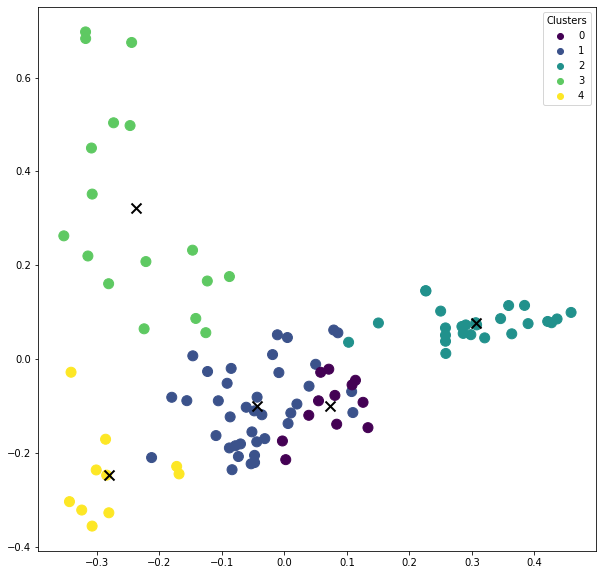

In [29]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Word Embeddings : le modèle Word2Vec

### Imports

In [30]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

## Chargement et traitement des phrases du corpus

### Création d'un objet qui streame les lignes d'un fichier pour économiser de la RAM

In [1]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [4]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

### Détection des bigrams

In [5]:
#Avec Data/sents ça ne marche pas et avec data/sents_short ça ne marche pas. J'ai écourté le fichier txt et rien ne marche. 
#J'ai essayé de faire un rapport commode mais je pense que jupyterlab ne m'aime pas :'D
bigram_phrases = Phrases(sentences)

NameError: name 'Phrases' is not defined

In [37]:
len(bigram_phrases.vocab.keys())

NameError: name 'bigram_phrases' is not defined

In [38]:
# Prenons une clé au hasard
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

NameError: name 'bigram_phrases' is not defined

In [64]:
bigram_phrases.vocab[key_]

6

### Conversion des `Phrases` en objet `Phraser`

`Phraser` est un alias pour `gensim.models.phrases.FrozenPhrases`
Le `Phraser` est une version *light* du `Phrases`, plus optimale pour transformer les phrases en concaténant les bigrams.

In [6]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

NameError: name 'Phraser' is not defined

### Extraction des trigrams

In [68]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [69]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigram

In [ ]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
print(corpus[:100])

## Entrainement d'un modèle Word2Vec sur ce corpus

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

### Sauver le modèle dans un fichier

In [ ]:
outfile = f"../data/bulletins.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [ ]:
model = Word2Vec.load("../data/bulletins.model")

### Imprimer le vecteur d'un terme

In [2]:
model.wv["bruxelles"]

NameError: name 'model' is not defined

### Calculer la similarité entre deux termes

In [1]:
model.wv.similarity("hospice", "hôpital")
model.wv.similarity("établissement", "rétablissement")
model.wv.similarity("mètres", "mettre")
model.wv.similarity("suffire", "souffrir")
model.wv.similarity("valoir", "falloir")
model.wv.similarity("entreprendre", "entreprise")

NameError: name 'model' is not defined

### Chercher les mots les plus proches d'un terme donné

In [ ]:
model.wv.most_similar("bruxelles", topn=10)
model.wv.most_similar("public", topn=10)
model.wv.most_similar("commune", topn=10)
model.wv.most_similar("hôpital", topn=10)

### Faire des recherches complexes à travers l'espace vectoriel

In [ ]:
print(model.wv.most_similar(positive=['bruxelles', 'france'], negative=['belgique']))